# Take-home assignment 4: Research operationalization and workflow

## Complete THA3 but with a different research question and dataset.

### __Research Question__: Is there a correlation between population density and number of gun violence incidents in major U.S. cities? 

In [1]:
import numpy as np                 
import pandas as pd 
 
import matplotlib.pyplot as plt     
import seaborn as sns            
import datetime as dt                

%matplotlib inline

In [2]:
from IPython.display import Image
img = 'flow.png'
Image(url=img, width=680, height=528)

# 1. Import Gun Violence Data 
## The first dataset, found on https://www.kaggle.com/jameslko/gun-violence-data, records over 260,000 gun violence incidents, originally compiled from www.gunviolence.org, a "not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States." 

### While the set includes many different variables related to each incident, for our purposes, we are concerned primarily with the following: 

* __incident_id__: Unique identification number
* __state__: Location of the incident by state
* __city_or_county__: Location of the incident by city or county
* __date__: Date of the incident 

##### To resolve the error: __'utf-8' codec can't decode byte 0x89 in position 9: invalid start byte__, we use special encoding when importing the .csv.

In [3]:
gvd = pd.read_csv("gvd.csv", encoding = "ISO-8859-1")

# 2. Explore and Clean Gun Violence Data 

* General data exploration 

In [4]:
gvd.head(1)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN


In [5]:
gvd.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [6]:
gvd.shape    

(239677, 29)

* Split date variable into three separate columns for: month, day, year

In [7]:
dates = pd.DataFrame(gvd.date.str.split('/',2).tolist(),
                                   columns = ['month','day','year'])

gvd = pd.concat([gvd,dates], axis = 1)

gvd.head(1)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,month,day,year
0,461105,1/1/13,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,1,1,13


* Subset the data to isolate only relevant variables

In [8]:
gvd = gvd[['incident_id','state','city_or_county','n_killed','n_injured','month','day','year']]
gvd.head()

,incident_id,state,city_or_county,n_killed,n_injured,month,day,year
0,461105,Pennsylvania,Mckeesport,0,4,1,1,13
1,460726,California,Hawthorne,1,3,1,1,13
2,478855,Ohio,Lorain,1,3,1,1,13
3,478925,Colorado,Aurora,4,0,1,5,13
4,478959,North Carolina,Greensboro,2,2,1,7,13


* Subset the data to include only incidents from 2016, the year of focus in the population density dataset imported below

In [9]:
print(gvd.shape)

gvd = gvd[gvd.year == '16']

print(gvd.shape)

gvd.head()

(239677, 8)
(58763, 8)


,incident_id,state,city_or_county,n_killed,n_injured,month,day,year
105711,477000,Massachusetts,Boston,0,1,1,1,16
105712,1023080,Connecticut,Meriden,0,0,1,1,16
105713,476977,Missouri,Kansas City,0,1,1,1,16
105714,476979,Missouri,Kansas City,0,1,1,1,16
105715,476661,Wisconsin,Cudahy,2,0,1,1,16


# 3. Import Population Density Data 
## The second dataset was compiled from https://www.governing.com/gov-data/population-density-land-area-cities-map.html and includes the population densities of U.S. cities with populations above 50,000. 

### The set includes the following variables: 

* __City__: Both city and state (we fix this mislabeling in the next step)
* __Population Density__: Populaton Density measured as Persons/Square Mile
* __2016 Pop__: Population of city in 2016
* __Land Area__: Total land area of each city measured in square miles

#### We are primarily concerned with city and population density. 

In [10]:
popd = pd.read_excel("PopDensity.xlsx")

# 4. Explore and Clean Population Density Data

* General data exploration 

In [11]:
popd.head()

,City,Population Density,2016 Pop,Land Area
0,"Abilene, Texas",1145,122225,107
1,"Akron, Ohio",3186,197633,62
2,"Alameda, California",7437,78906,11
3,"Albany, Georgia",1339,73801,55
4,"Albany, New York",4587,98111,21


In [12]:
popd.describe()

,Population Density,2016 Pop,Land Area
count,754.000000,7.540000e+02,754.000000
mean,4242.729443,1.646172e+05,55.015915
std,4323.792554,3.973563e+05,95.695024
min,172.000000,5.007700e+04,1.000000
25%,2076.000000,6.417050e+04,19.000000
50%,3128.500000,8.669450e+04,31.500000
75%,4720.000000,1.380125e+05,54.750000
max,54138.000000,8.537673e+06,1705.000000


In [13]:
popd.shape

(754, 4)

* Split city variable into two separate columns for: city and state

In [14]:
citystate = pd.DataFrame(popd.City.str.split(',',1).tolist(),
                                   columns = ['city','state'])

popd = pd.concat([popd,citystate],axis=1)

popd.head()

,City,Population Density,2016 Pop,Land Area,city,state
0,"Abilene, Texas",1145,122225,107,Abilene,Texas
1,"Akron, Ohio",3186,197633,62,Akron,Ohio
2,"Alameda, California",7437,78906,11,Alameda,California
3,"Albany, Georgia",1339,73801,55,Albany,Georgia
4,"Albany, New York",4587,98111,21,Albany,New York


* Subset the data to isolate only relevant variables

In [15]:
popd = popd[['Population Density','city']]
popd.head()

,Population Density,city
0,1145,Abilene
1,3186,Akron
2,7437,Alameda
3,1339,Albany
4,4587,Albany


# 5. Merge two datasets for comparative analysis 

* Convert 'popd' to dictionary with city as the index

In [16]:
popd = popd.set_index('city').T.to_dict('list')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


* Map population densities to gun violence dataset by city

In [17]:
gvd["popden"] = gvd['city_or_county'].map(popd)

In [18]:
print(gvd.shape)
gvd.head()

(58763, 9)


,incident_id,state,city_or_county,n_killed,n_injured,month,day,year,popden
105711,477000,Massachusetts,Boston,0,1,1,1,16,[13943]
105712,1023080,Connecticut,Meriden,0,0,1,1,16,[2506]
105713,476977,Missouri,Kansas City,0,1,1,1,16,[1529]
105714,476979,Missouri,Kansas City,0,1,1,1,16,[1529]
105715,476661,Wisconsin,Cudahy,2,0,1,1,16,NaN


* Drop missing values, which represent cities with populations below 50,000 that were not included in the population density dataset 

In [19]:
print(gvd.shape)
gvd.dropna(inplace=True)
print(gvd.shape)
gvd.head()

(58763, 9)
(38472, 9)


,incident_id,state,city_or_county,n_killed,n_injured,month,day,year,popden
105711,477000,Massachusetts,Boston,0,1,1,1,16,[13943]
105712,1023080,Connecticut,Meriden,0,0,1,1,16,[2506]
105713,476977,Missouri,Kansas City,0,1,1,1,16,[1529]
105714,476979,Missouri,Kansas City,0,1,1,1,16,[1529]
105716,476935,Louisiana,Kenner,0,1,1,1,16,[4512]


* Clean up values of 'popden' column 

In [20]:
gvd["popden"] = gvd["popden"].astype(str)
gvd["popden"] = gvd["popden"].map(lambda x: x.lstrip("[").rstrip("]"))
gvd.head()

,incident_id,state,city_or_county,n_killed,n_injured,month,day,year,popden
105711,477000,Massachusetts,Boston,0,1,1,1,16,13943
105712,1023080,Connecticut,Meriden,0,0,1,1,16,2506
105713,476977,Missouri,Kansas City,0,1,1,1,16,1529
105714,476979,Missouri,Kansas City,0,1,1,1,16,1529
105716,476935,Louisiana,Kenner,0,1,1,1,16,4512


# 6. Create final dataset to answer research question

* GroupBy method to group data by City, Population Density, and Number of Unique Incidents per City 

In [21]:
final = gvd.groupby(['city_or_county','popden'])['incident_id'].nunique()

* Create 'final' dataframe from the GroupBy results

In [22]:
final = pd.DataFrame(final)
final.head()

,,incident_id
city_or_county,popden,
Abilene,1145,59
Akron,3186,88
Alameda,7437,3
Albany,3034,102
Albuquerque,2979,165


* Reset dataframe index

In [23]:
final.reset_index(inplace=True)
final.head()

,city_or_county,popden,incident_id
0,Abilene,1145,59
1,Akron,3186,88
2,Alameda,7437,3
3,Albany,3034,102
4,Albuquerque,2979,165


* Convert 'popden' variable to INT for visualizaiton 

In [24]:
final["popden"] = final["popden"].astype(int)

* Rename variables for clarity

In [25]:
final.rename({"city_or_county": "city", 'incident_id':'incident_count'}, axis = 'columns',inplace=True )
final.head()

,city,popden,incident_count
0,Abilene,1145,59
1,Akron,3186,88
2,Alameda,7437,3
3,Albany,3034,102
4,Albuquerque,2979,165


# 7. Create scatterplot of Population Density and Number of Incidents 

Text(0, 0.5, 'Population Density (Persons/Sq. Mile)')

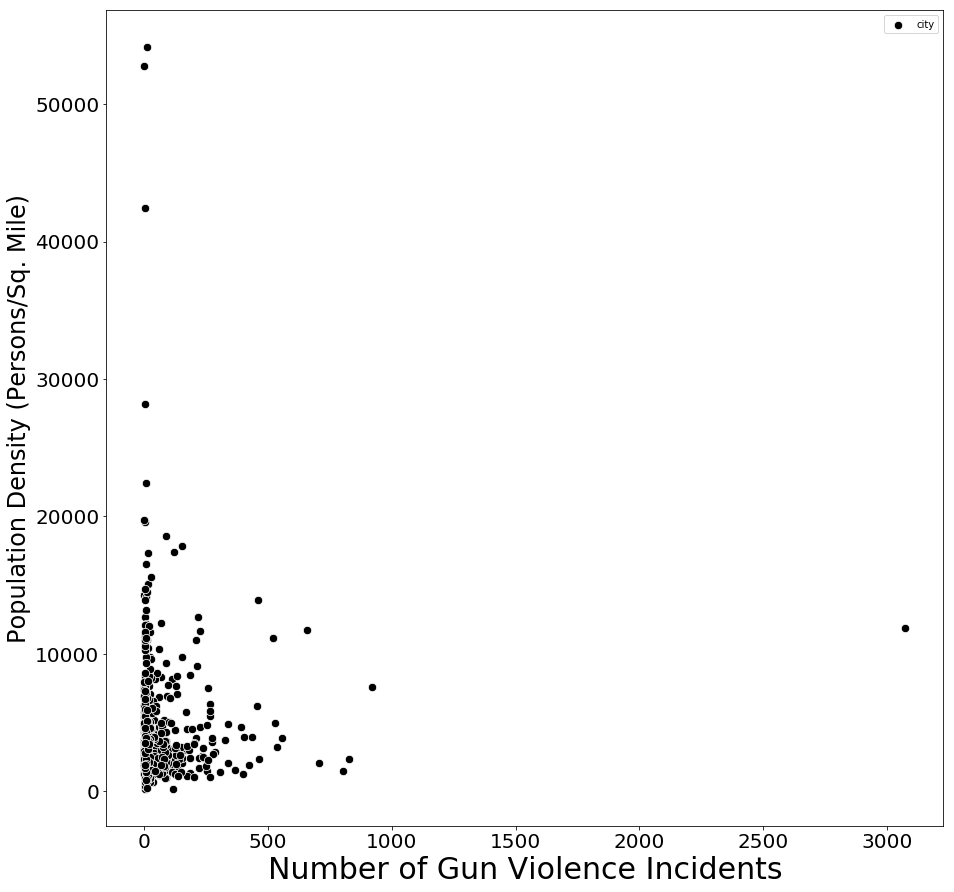

In [26]:
plt.figure(figsize=(15, 15))

ax = sns.scatterplot(x="incident_count", y="popden", data=final, s=70, color='k', label='city')
ax.set_xlabel("Number of Gun Violence Incidents",fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylabel("Population Density (Persons/Sq. Mile)",fontsize=24)

# 8. Check and remove outlier

* Isolate the outlying maximum value in gun violence incidents

In [27]:
final.describe()

,popden,incident_count
count,645.000000,645.000000
mean,4338.486822,59.646512
std,4583.860172,160.276127
min,172.000000,1.000000
25%,2067.000000,5.000000
50%,3126.000000,14.000000
75%,4714.000000,52.000000
max,54138.000000,3075.000000


In [28]:
final[final.incident_count == 3075]

,city,popden,incident_count
104,Chicago,11883,3075


* Remove outlier 

In [29]:
print(final.shape)
final = final[final.city != 'Chicago']
print(final.shape)

(645, 3)
(644, 3)


# 9. Visualize data without outlier 

Text(0, 0.5, 'Population Density (Persons/Sq. Mile)')

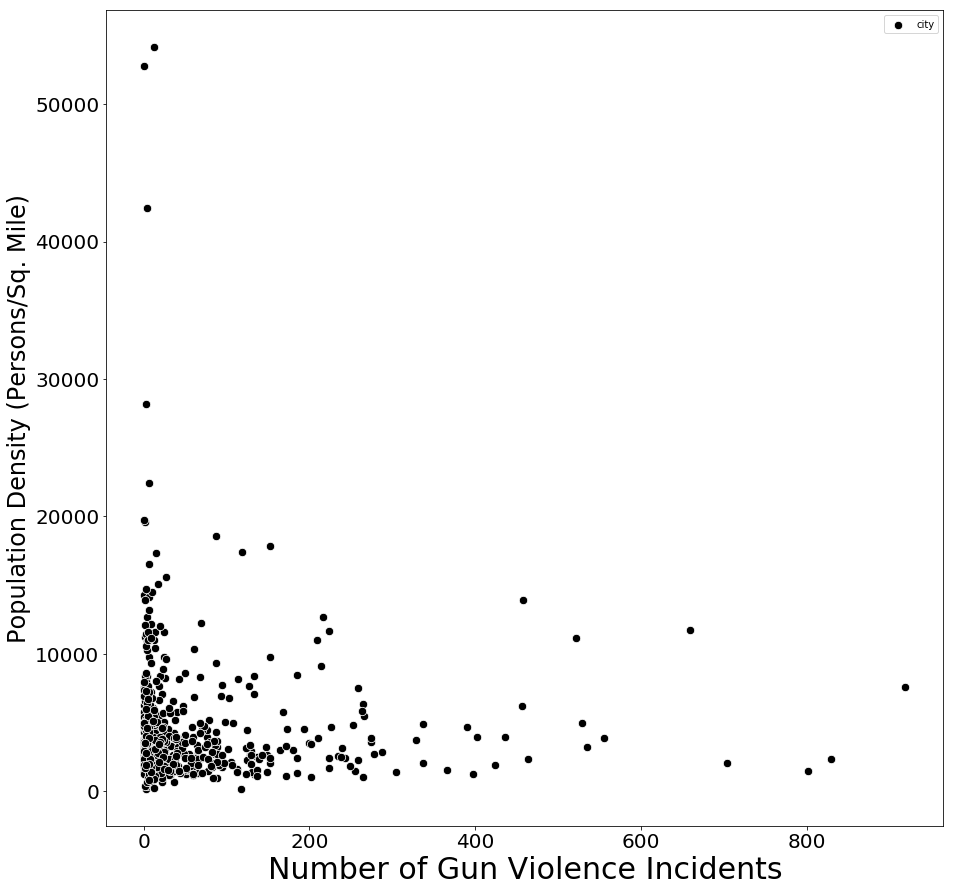

In [30]:
plt.figure(figsize=(15, 15))

ax = sns.scatterplot(x="incident_count", y="popden", data=final, s=70, color='k', label='city')
ax.set_xlabel("Number of Gun Violence Incidents",fontsize=30)
ax.tick_params(labelsize=20)
ax.set_ylabel("Population Density (Persons/Sq. Mile)",fontsize=24)

# 10. Check correlation with correlation matrix

In [31]:
corr=final[['popden','incident_count']].corr()
corr.style.background_gradient()

,popden,incident_count
popden,1,-0.0102031
incident_count,-0.0102031,1


# Unfortuantely, after running the analysis, we discovered no correlation between population density and number of incidents of gun violence and will need to rethink our hypothesis for further analysis. 